In [50]:
import pandas as pd
import numpy as np
import os
import tqdm

# Lectura de los datos y construcción del json

In [3]:
import glob

data_dir="hotels/data/"
csvs= glob.glob(data_dir +"*.csv")

cities=[]

for csv in csvs:
    city=csv.split("\\")[1]
    city=city.split(".")[0]
    cities.append(city)

In [4]:
cities

['beijing',
 'chicago',
 'dubai',
 'las-vegas',
 'london',
 'montreal',
 'new-delhi',
 'new-york-city',
 'san-francisco',
 'shanghai']

In [93]:
data ={key: {} for key in cities}

In [94]:
data

{'beijing': {},
 'chicago': {},
 'dubai': {},
 'las-vegas': {},
 'london': {},
 'montreal': {},
 'new-delhi': {},
 'new-york-city': {},
 'san-francisco': {},
 'shanghai': {}}

Lectura y guardado de las reviews en el json: 

Nota: Las reviews de Dubai tiene un encoding diferente (latin_1).

In [5]:
for city in cities:
    hotels=os.listdir(data_dir + city)
    for hotel in hotels:
        try:
            hotel_reviews= open(data_dir+city+"/"+hotel,"r").read()
        except:
            hotel_reviews==open(data_dir+city+"/"+hotel,"rb").read().decode("latin_1") 
            
        rev_list= hotel_reviews.split("\t\n")[:-1]# el último elemento queda ocupado por un string vacío. Por tanto lo quitamos
        rev_dic= dict(zip(range(len(rev_list)), rev_list))

        data[city][hotel]=rev_dic
                   

                
    print(city)

beijing
chicago
dubai
las-vegas
london
montreal
new-delhi
new-york-city
san-francisco
shanghai


In [7]:
data["beijing"]

{'china_beijing_aloft_beijing_haidian': {0: "Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planni

# Análisis del idioma

A simple vista parece que todas las reviews están en inglés, pero es perfectamente posible que las haya en otros idiomas. En este apartado veremos qué proporción de reviews no están en inglés. Si es una cantidad ínfima, las descartaremos del posterior análisis. En caso contrario, tendremos que buscar alguna manera de que los distintos idiomas no afecten a los resultados.

In [5]:
from langdetect import detect, DetectorFactory

En esta celda se ha buscado aplicar una función a todas las celdas del json. 

In [135]:
language_study={city_key:{key: {"reviews":0,"english":0, "others":0} for key in data[city_key].keys()} for city_key in cities}

for city in tqdm.tqdm(cities):
    print(city)

    city_data=data[city]
    hotels=list(city_data.keys())


    for hotel in tqdm.tqdm(hotels):
        reviews=city_data[hotel]

        n_reviews=len(reviews)
        
        language_study[city][hotel]["reviews"]=n_reviews
        for review in reviews:
            try:
                DetectorFactory.seed = 0
                if detect(review) != "en":
                    language_study[city][hotel]["others"] +=1/n_reviews
                else: 
                    language_study[city][hotel]["english"] +=1/n_reviews
            except:
                pass
            
    
        

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

beijing



 10%|████████▎                                                                          | 1/10 [01:34<14:10, 94.50s/it]

chicago



 20%|████████████████▍                                                                 | 2/10 [06:09<26:46, 200.82s/it]

dubai



 62%|█████████████████████████████████████████████████▍                              | 146/236 [02:41<02:31,  1.68s/it]


 30%|████████████████████████▌                                                         | 3/10 [09:45<24:14, 207.81s/it]

las-vegas



 70%|████████████████████████████████████████████████████████                        | 145/207 [04:30<03:05,  2.99s/it]


 40%|████████████████████████████████▊                                                 | 4/10 [16:49<29:18, 293.10s/it]

london



 16%|████████████▍                                                                   | 136/875 [02:26<20:38,  1.68s/it]


 31%|█████████████████████████                                                       | 274/875 [05:04<03:29,  2.87it/s]


 47%|█████████████████████████████████████▍                                          | 410/875 [08:33<06:28,  1.20it/s]


 63%|██████████████████████████████████████████████████                              | 548/875 [11:53<05:07,  1.06it/s]


 78%|██████████████████████████████████████████████████████████████▌                 | 684/875 [15:46<02:32,  1.26it/s]


 94%|██████████████████████████████████████████████████████████████████████████▉     | 820/875 [19:52<00:49,  1.12it/s]


 50%|█████████████████████████████████████████                                         | 5/10 [37:51<53:31, 642.40s/it]

montreal



 57%|█████████████████████████████████████████████▍                                  | 141/248 [02:38<00:56,  1.89it/s]


 60%|█████████████████████████████████████████████████▏                                | 6/10 [42:34<34:41, 520.32s/it]

new-delhi



 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [43:45<18:40, 373.40s/it]

new-york-city



 52%|█████████████████████████████████████████▏                                      | 133/258 [06:49<09:52,  4.74s/it]


 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [57:16<17:05, 512.75s/it]

san-francisco



 63%|██████████████████████████████████████████████████▍                             | 135/214 [04:40<02:13,  1.69s/it]


 90%|████████████████████████████████████████████████████████████████████████        | 9/10 [1:04:29<08:07, 487.71s/it]

shanghai



100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:05:40<00:00, 394.04s/it]


In [136]:
language_study

{'beijing': {'china_beijing_aloft_beijing_haidian': {'reviews': 7,
   'english': 0.857142857142857,
   'others': 0.14285714285714285},
  'china_beijing_ascott_beijing': {'reviews': 28,
   'english': 0.9999999999999997,
   'others': 0},
  'china_beijing_autumn_garden_courtyard_hotel': {'reviews': 7,
   'english': 0.9999999999999998,
   'others': 0},
  'china_beijing_bamboo_garden_hotel': {'reviews': 54,
   'english': 0.9259259259259249,
   'others': 0.07407407407407407},
  'china_beijing_beijing_century_towers': {'reviews': 2,
   'english': 1.0,
   'others': 0},
  'china_beijing_beijing_dong_fang_hotel': {'reviews': 20,
   'english': 0.9500000000000003,
   'others': 0.05},
  'china_beijing_beijing_far_east_international_youth_hostel': {'reviews': 33,
   'english': 0.8787878787878782,
   'others': 0.12121212121212122},
  'china_beijing_beijing_friendship_hotel_grand_building': {'reviews': 40,
   'english': 0.9750000000000005,
   'others': 0.025},
  'china_beijing_beijing_guangming_hotel'

Trabajar con diccionarios parece ser muy costoso. Podríamos hacer consultas con Mongo, pero  lo transformaremos en un df por comodidad.

Transformamos el json en df:

In [8]:
df=pd.DataFrame.from_dict({(i,j): data[i][j] 
                           for i in list(data.keys() )
                           for j in list(data[i].keys())},
                       orient='index')

In [34]:
df.head()

0    \
beijing china_beijing_aloft_beijing_haidian          Oct 12 2009 \tNice trendy hotel location not t...   
        china_beijing_ascott_beijing                 Nov 17 2009 \tgreat room layout service value-...   
        china_beijing_autumn_garden_courtyard_hotel  \tVERY NICE HOTEL\tWe get vacation every year ...   
        china_beijing_bamboo_garden_hotel            Oct 11 2009 \tA hidden gem\tWe stayed at this ...   
        china_beijing_beijing_century_towers         Dec 24 2007 \tNice property\tWe booked a three...   

                                                                                                   1    \
beijing china_beijing_aloft_beijing_haidian          Sep 25 2009 \tGreat Budget Hotel!\tStayed two ...   
        china_beijing_ascott_beijing                 Nov 7 2009 \tA quality hotel with quality serv...   
        china_beijing_autumn_garden_courtyard_hotel  Nov 19 2009 \tA fantastic hotel\tMy boyfriend ...   
        china_beijing_bamboo_garden_hotel            Sep 23 2009 \tAll we were hoping for was there...   
        china_beijing_beijing_century_towers         Sep 15 2006 \tGreat hotel for large groups! (a...   

                                                                                                   2    \
beijing china_beijing_aloft_beijing_haidian          Aug 4 2009 \tExcellent value - location not a ...   
        china_beijing_ascott_beijing                 Oct 16 2009 \tclean rooms good location poor s...   
        china_beijing_autumn_garden_courtyard_hotel  Sep 11 2009 \tnice place to stay\tThe staff ar...   
        china_beijing_bamboo_garden_hotel            Aug 16 2009 \tGreat value for Money\tExcellent...   
        china_beijing_beijing_century_towers                                                       NaN   

                                                                                                   3    \
beijing china_beijing_aloft_beijing_haidian          Jul 17 2009 \tStylish clean reasonable value p...   
        china_beijing_ascott_beijing                 Sep 18 2009 \tAmazing find for a group that wa...   
        china_beijing_autumn_garden_courtyard_hotel  Dec 14 2008 \tReccomended\tThis is a great lit...   
        china_beijing_bamboo_garden_hotel            Jul 29 2009 \tExcellent character hotel\tWe we...   
        china_beijing_beijing_century_towers                                                       NaN   

                                                                                                   4    \
beijing china_beijing_aloft_beijing_haidian          May 30 2009 \tRemote but excellent value for m...   
        china_beijing_ascott_beijing                 Sep 5 2009 \tGood Value for large family - Int...   
        china_beijing_autumn_garden_courtyard_hotel  Nov 10 2008\tan oasis in Beijing\tJust got bac...   
        china_beijing_bamboo_garden_hotel            Jul 19 2009 \tCourtyard hotel in the hutongs\t...   
        china_beijing_beijing_century_towers                                                       NaN   

                                                                                                   5    \
beijing china_beijing_aloft_beijing_haidian          Dec 31 2008 \tGood value but not downtown\tThi...   
        china_beijing_ascott_beijing                 Aug 17 2009\tdon't rely on it if you have any ...   
        china_beijing_autumn_garden_courtyard_hotel  Nov 1 2008 \tLovely traditional style hotel\tT...   
        china_beijing_bamboo_garden_hotel            Jun 1 2009 \tLovely boutique hotel with good s...   
        china_beijing_beijing_century_towers                                                       NaN   

                                                                                                   6    \
beijing china_beijing_aloft_beijing_haidian                        Jul 20 2009 \t???????????????????\t   
        china_beijing_ascott_beijing                 Aug 15 2009 

Definimos una función para detectar el idioma de cada review:

In [23]:
from langdetect import detect, DetectorFactory

def detect_language(text):
     DetectorFactory.seed = 0
     if type(text) == str:
         try: 
            language=detect(text)
         except:
            language= ""
         return(language)    

Creamos otro df donde guardaremos los resultados:

In [10]:
language_df=pd.DataFrame("",index=df.index, columns= df.columns)

Aplicamos la función a cada hotel:

In [63]:
import time

start = time.time()

for city in tqdm.tqdm(cities):
    hotels=df.loc[city].index
        
    for hotel in tqdm.tqdm(hotels):
        reviews=df.loc[city].loc[hotel]
        reviews= reviews.dropna()
        language_df.loc[city].loc[hotel]=reviews.apply(detect_language)


end = time.time()

print((end - start)/60)
    

 20%|████████████████▍                                                                | 28/138 [00:27<01:41,  1.09it/s]


 20%|████████████████▍                                                                | 48/236 [00:24<02:22,  1.32it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 232/236 [01:43<00:01,  3.01it/s]


 74%|███████████████████████████████████████████████████████████▌                    | 154/207 [02:45<01:37,  1.84s/it]


 11%|█████████                                                                        | 98/875 [00:59<15:33,  1.20s/it]


 28%|██████████████████████▋                                                         | 248/875 [03:23<04:40,  2.24it/s]


 45%|████████████████████████████████████▎                                           | 397/875 [05:19<05:06,  1.56it/s]


 62%|█████████████████████████████████████████████████▉                              | 546/875 [07:15<02:52,  1.91it/s]


 80%|███████████████████████████████████████████████████████████████▋                | 696/875 [09:29<03:04,  1.03s/it]


 96%|█████████████████████████████████████████████████████████████████████████████   | 843/875 [11:54<00:20,  1.60it/s]


 48%|██████████████████████████████████████▍                                         | 119/248 [01:18<02:35,  1.20s/it]


 22%|██████████████████                                                               | 29/130 [00:07<00:14,  6.86it/s]


 23%|██████████████████▌                                                              | 59/258 [01:37<07:21,  2.22s/it]


 76%|████████████████████████████████████████████████████████████▍                   | 195/258 [05:38<00:39,  1.59it/s]


 36%|█████████████████████████████▌                                                   | 78/214 [01:23<04:59,  2.20s/it]


  1%|▋                                                                                 | 1/126 [00:00<00:22,  5.49it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [36:35<00:00, 219.57s/it]

36.59432783126831


In [64]:
language_df.head()

0   1    2    3    4    \
beijing china_beijing_aloft_beijing_haidian          en  en   en   en   en   
        china_beijing_ascott_beijing                 en  en   en   en   en   
        china_beijing_autumn_garden_courtyard_hotel  en  en   en   en   en   
        china_beijing_bamboo_garden_hotel            en  en   en   en   en   
        china_beijing_beijing_century_towers         en  en  NaN  NaN  NaN   

                                                     5    6    7    8    9    \
beijing china_beijing_aloft_beijing_haidian           en   ro  NaN  NaN  NaN   
        china_beijing_ascott_beijing                  en   en   en   en   en   
        china_beijing_autumn_garden_courtyard_hotel   en   en  NaN  NaN  NaN   
        china_beijing_bamboo_garden_hotel             en   en   en   en   en   
        china_beijing_beijing_century_towers         NaN  NaN  NaN  NaN  NaN   

                                                     ...  592  593  594  595  \
beijing china_beijing_aloft_beijing_haidian          ...  NaN  NaN  NaN  NaN   
        china_beijing_ascott_beijing                 ...  NaN  NaN  NaN  NaN   
        china_beijing_autumn_garden_courtyard_hotel  ...  NaN  NaN  NaN  NaN   
        china_beijing_bamboo_garden_hotel            ...  NaN  NaN  NaN  NaN   
        china_beijing_beijing_century_towers         ...  NaN  NaN  NaN  NaN   

                                                     596  597  598  599  600  \
beijing china_beijing_aloft_beijing_haidian          NaN  NaN  NaN  NaN  NaN   
        china_beijing_ascott_beijing                 NaN  NaN  NaN  NaN  NaN   
        china_beijing_autumn_garden_courtyard_hotel  NaN  NaN  NaN  NaN  NaN   
        china_beijing_bamboo_garden_hotel            NaN  NaN  NaN  NaN  NaN   
        china_beijing_beijing_century_towers         NaN  NaN  NaN  NaN  NaN   

                                                     601  
beijing china_beijing_aloft_beijing_haidian          NaN  
        china_beijing_ascott_beijing                 NaN  
        china_beijing_autumn_garden_courtyard_hotel  NaN  
        china_beijing_bamboo_garden_hotel            NaN  
        china_beijing_beijing_century_towers         NaN  

[5 rows x 602 columns]

In [65]:
language_df.to_csv("language_df.csv")

In [35]:
language_df= pd.read_csv("language_df.csv", low_memory=False,index_col=[0,1],)

Ahora nos interesa calcular la proporción de reviews en inglés de cada hotel:

In [37]:
def english_counter(arr):
    return(len(arr[arr == "en"])/len(arr.dropna()))
    

In [38]:
language_df["eng_prop"]=language_df.apply(english_counter, axis=1)

In [39]:
language_df["reviews_len"]=language_df.apply(lambda x: len(x.dropna()), axis=1)

Vemos qué hoteles tienen esta proporción menor que 0.5:

In [40]:
language_df[["eng_prop", "reviews_len"]][language_df["eng_prop"]<0.5]

eng_prop  \
london   uk_england_london_andrews_house_hotel               0.466667   
         uk_england_london_new_pembury_central_park          0.444444   
         uk_england_london_viking_hotel                      0.450000   
shanghai china_shanghai_renaissance_shanghai_zhongshan_p...  0.357143   

                                                             reviews_len  
london   uk_england_london_andrews_house_hotel                        16  
         uk_england_london_new_pembury_central_park                   10  
         uk_england_london_viking_hotel                               21  
shanghai china_shanghai_renaissance_shanghai_zhongshan_p...           15

De todo el conjunto de hoteles sólo hay cuatro con menos del 50 % de reviews en inglés.

Eliminamos del df todas aquellas que estén en otros idiomas:

In [89]:
language_df = language_df.iloc[: , :-2]

In [129]:
language_df.columns= df.columns #por algún motivo las columnas de uno están en formato string mientra que las del otro en formato integer. Tienen que ser iguales para poder aplicar la condición de la siguiente celda:

In [131]:
df=df[language_df=="en"]

In [132]:
df.to_csv("df.csv")

In [33]:
df=pd.read_csv("df.csv", low_memory=False,index_col=[0,1])

# Partes de habitación más mencionadas

In [55]:
import re
from collections import Counter
import string
import nltk
from nltk.stem import WordNetLemmatizer

Función para transformar las palabras de interés en expresión regular:

In [42]:
words=["room", "bed","wardrobe"]


def words_to_regex(words):
    regex_list=[]
    for word in words:
        if word=="room":
            regex="\\w*"+word+"[s]*"+"\\b|"
        elif word=="balcony":
            regex="\\b"+word[0:-1]+"[y|ies]\\b|"
        else :
            regex="\\b"+word+"[s]*\\b|"
            
        regex_list.append(regex)

    return("".join(regex_list)[0:-1])

print(words_to_regex(words))

\w*room[s]*\b|\bbed[s]*\b|\bwardrobe[s]*\b


In [56]:
lemmatizer = WordNetLemmatizer()


def rooms(text, regex):
    if type(text) == str:
        #quitamos signos de puntuación, números y lo pasamos todo a minúsculas:
        text=text.translate(str.maketrans("","",string.punctuation)).translate(str.maketrans("","",string.digits)).lower()
        
        #aplicamos la expresión regular
        words=re.findall(regex,text) 
        
        #definimos el Counter
        word_frequency= Counter()
        

        
        for ind,word in enumerate(words):
            #nos quedamos con el lema de la palabra. En el caso de que esté en plural la pasa a singular
            word=lemmatizer.lemmatize(word,pos="n") 
            word_frequency[word] += 1
        return(word_frequency)

Definimos el df donde guardaremos los resultados:

In [ ]:
hotel_info=pd.DataFrame("",index=df.index, columns= ["room_info"],dtype=object)

Generamos la expresión regular:

In [52]:
input_words=["room","bed","wardrobe","closet","sofa","chair","table","balcony","carpet","toilet","jacuzzi","bathtub","kitchen","fridge","freezer"]

regex=words_to_regex(input_words)
print(regex)

\w*room[s]*\b|\bbed[s]*\b|\bwardrobe[s]*\b|\bcloset[s]*\b|\bsofa[s]*\b|\bchair[s]*\b|\btable[s]*\b|\bbalcon[y|ies]\b|\bcarpet[s]*\b|\btoilet[s]*\b|\bjacuzzi[s]*\b|\bbathtub[s]*\b|\bkitchen[s]*\b|\bfridge[s]*\b|\bfreezer[s]*\b


Aplicamos la función *rooms* a todos los hoteles:

In [57]:
for city in tqdm.tqdm(cities):
    hotels=df.loc[city].index
    for hotel in hotels:
        reviews=df.loc[city].loc[hotel]
        reviews= reviews.dropna()
        
        words_for_review=reviews.apply(rooms,regex=regex)
        hotel_info.loc[city].loc[hotel].room_info=dict(words_for_review.sum().most_common())

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:44<00:00, 10.41s/it]


In [58]:
hotel_info.head()

room_info  \
beijing china_beijing_aloft_beijing_haidian             {'room': 8, 'bed': 4, 'fridge': 1, 'table': 1}   
        china_beijing_ascott_beijing                 {'room': 54, 'bedroom': 20, 'kitchen': 17, 'ba...   
        china_beijing_autumn_garden_courtyard_hotel  {'room': 8, 'bathroom': 3, 'toilet': 1, 'subwa...   
        china_beijing_bamboo_garden_hotel            {'room': 69, 'bed': 21, 'bathroom': 17, 'bedro...   
        china_beijing_beijing_century_towers         {'room': 12, 'bedroom': 3, 'kitchen': 2, 'bed'...   

                                                                                              services  \
beijing china_beijing_aloft_beijing_haidian            {'gym': 2, 'restaurant': 2, 'swimming pool': 1}   
        china_beijing_ascott_beijing                 {'restaurant': 20, 'gym': 10, 'swimming pool': 1}   
        china_beijing_autumn_garden_courtyard_hotel                                                 {}   
        china_beijing_bamboo_garden_hotel                                 {'restaurant': 28, 'spa': 1}   
        china_beijing_beijing_century_towers                                         {'restaurant': 1}   

                                                                                                places  
beijing china_beijing_aloft_beijing_haidian          0                                     {aloha, ...  
        china_beijing_ascott_beijing                 0                                             ...  
        china_beijing_autumn_garden_courtyard_hotel  0                                      {asia, ...  
        china_beijing_bamboo_garden_hotel                                                               
        china_beijing_beijing_century_towers         0                     {astoria}\n1    {shangha...

De cada ciudad mostramos las 20 partes de la habitación más mencionadas:

In [51]:
for city in cities:
    
    print("  ")
    print("-"*20+city+"-"*20)
    print(" ")
    print(pd.DataFrame.from_dict(dict(hotel_info.loc[city].room_info.apply(lambda x: Counter(x)).sum().most_common()), orient="index", columns=["mentions"])[0:20])

  
--------------------beijing--------------------
 
          mentions
room          9107
bed           1560
bathroom      1381
bedroom        323
table          234
toilet         199
carpet         190
kitchen        168
chair          104
bathtub         88
closet          85
fridge          81
sofa            59
inroom          55
jacuzzi         44
balcony         29
washroom        19
wardrobe        16
mushroom        15
ballroom         8
  
--------------------chicago--------------------
 
           mentions
room          42519
bed            8838
bathroom       5945
bedroom        1014
chair           820
closet          779
table           728
carpet          723
toilet          681
fridge          636
kitchen         621
sofa            475
bathtub         272
inroom          258
jacuzzi         107
ballroom         82
balcony          74
restroom         46
wardrobe         41
guestroom        34
  
--------------------dubai--------------------
 
          mentions
room 

In [53]:
import matplotlib.pyplot as plt

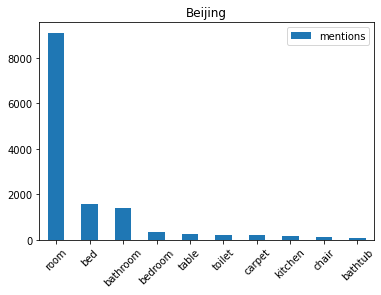

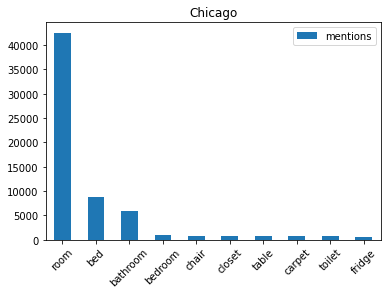

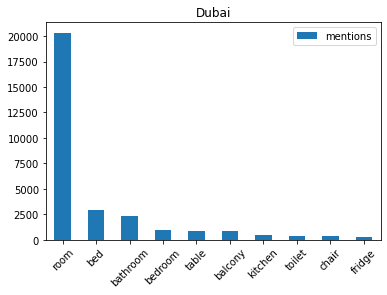

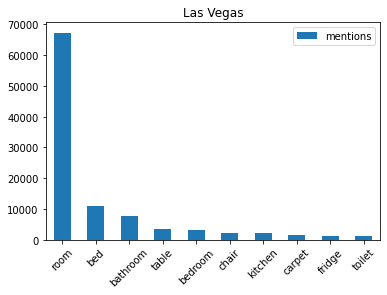

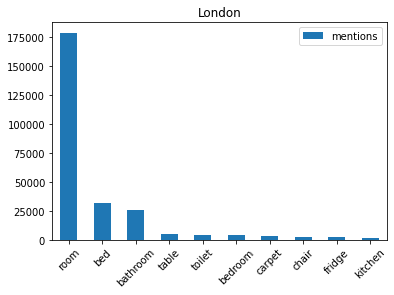

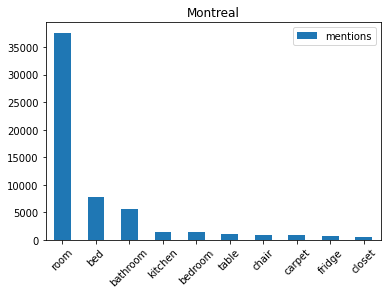

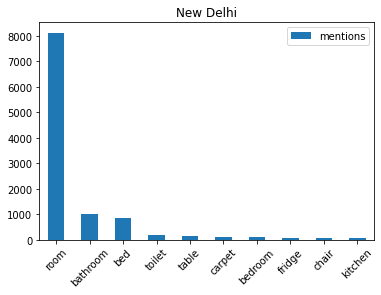

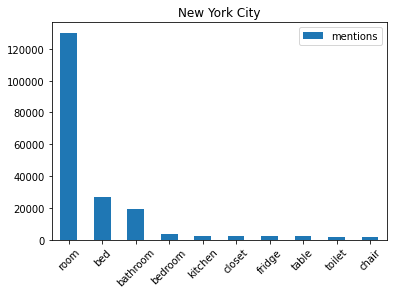

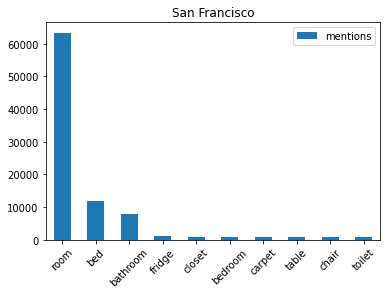

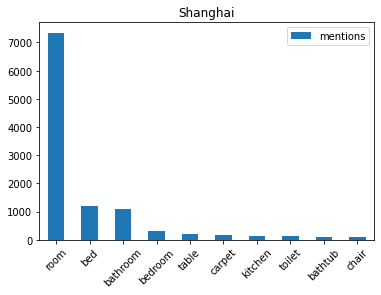

In [71]:
for city in cities:
    mentions=pd.DataFrame.from_dict(dict(hotel_info.loc[city].room_info.apply(lambda x: Counter(x)).sum().most_common()), orient="index", columns=["mentions"])[0:10]
    title=city.split("-")
    title=[x[0].upper() + x[1:len(x)] for x in title]
    title=" ".join(title)
    mentions.plot.bar(title=title, rot=45)

#  ¿Qué servicios pueden detectarse por cada hotel? Por ejemplo, gimnasio, spa, piscina, restaurante, …

In [72]:
lemmatizer = WordNetLemmatizer()

def services(text, regex):
    if type(text) == str:
        #quitamos signos de puntuación, números y lo pasamos todo a minúsculas
        text=text.translate(str.maketrans("","",string.punctuation)).translate(str.maketrans("","",string.digits)).lower()
        
        #aplicamos la expresión regular
        words=re.findall(regex,text)   
        
        #definimos el Counter
        word_frequency= Counter()
        

        
        for ind,word in enumerate(words):
            word=lemmatizer.lemmatize(word,pos="n") #nos quedamos con el lema de la palabra. En el caso de que esté en plural la pasa a singular
            word_frequency[word] += 1
        return(word_frequency)

Añadimos la columna *services*:

In [16]:
hotel_info["services"]=" "

Generamos la expresión regular:

In [73]:
input_words=["gym","swimming pool","restaurant","pub","disco","spa"]

regex=words_to_regex(input_words)

Aplicamos la función *services* a todos los hoteles:

In [97]:
for city in tqdm.tqdm(cities):
    hotels=df.loc[city].index
    for hotel in hotels:
        reviews=df.loc[city].loc[hotel]
        reviews= reviews.dropna()
        
        words_for_review=reviews.apply(services,regex=regex)
        hotel_info.loc[city].loc[hotel].services=dict(words_for_review.sum().most_common())

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.14s/it]


In [95]:
hotel_info.head()

room_info  \
beijing china_beijing_aloft_beijing_haidian             {'room': 8, 'bed': 4, 'fridge': 1, 'table': 1}   
        china_beijing_ascott_beijing                 {'room': 54, 'bedroom': 20, 'kitchen': 17, 'ba...   
        china_beijing_autumn_garden_courtyard_hotel  {'room': 8, 'bathroom': 3, 'toilet': 1, 'subwa...   
        china_beijing_bamboo_garden_hotel            {'room': 69, 'bed': 21, 'bathroom': 17, 'bedro...   
        china_beijing_beijing_century_towers         {'room': 12, 'bedroom': 3, 'kitchen': 2, 'bed'...   

                                                                                              services  \
beijing china_beijing_aloft_beijing_haidian            {'gym': 2, 'restaurant': 2, 'swimming pool': 1}   
        china_beijing_ascott_beijing                 {'restaurant': 20, 'gym': 10, 'swimming pool': 1}   
        china_beijing_autumn_garden_courtyard_hotel                                                 {}   
        china_beijing_bamboo_garden_hotel                                 {'restaurant': 28, 'spa': 1}   
        china_beijing_beijing_century_towers                                         {'restaurant': 1}   

                                                                                                places  
beijing china_beijing_aloft_beijing_haidian          0                                     {aloha, ...  
        china_beijing_ascott_beijing                 0                                             ...  
        china_beijing_autumn_garden_courtyard_hotel  0                                      {asia, ...  
        china_beijing_bamboo_garden_hotel                                                               
        china_beijing_beijing_century_towers         0                     {astoria}\n1    {shangha...

In [70]:
hotel_info.loc["london"].loc["uk_england_london_130_queensgate_london_apartments"].services

{'restaurant': 6, 'pub': 1}

In [76]:
for city in cities:
    
    print("  ")
    print("-"*20+city+"-"*20)
    print(" ")
    print(pd.DataFrame.from_dict(dict(hotel_info.loc[city].services.apply(lambda x: Counter(x)).sum().most_common()), orient="index", columns=["mentions"])[0:20])

  
--------------------beijing--------------------
 
                mentions
restaurant          2498
gym                  350
spa                  307
swimming pool        190
pub                   15
swimming pools         2
disco                  1
  
--------------------chicago--------------------
 
                mentions
restaurant          5564
gym                  649
spa                  488
pub                  204
swimming pool        131
disco                 17
swimming pools         4
  
--------------------dubai--------------------
 
                mentions
restaurant          6459
spa                 1118
gym                  867
swimming pool        512
pub                  254
disco                127
swimming pools       115
  
--------------------las-vegas--------------------
 
                mentions
restaurant          6430
spa                 2361
gym                  735
swimming pool        350
pub                  171
swimming pools        87
disco        

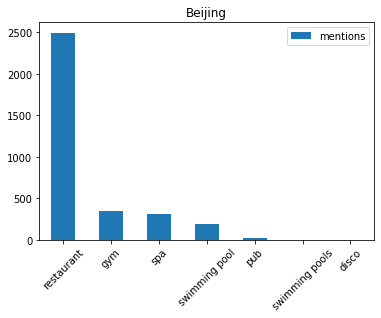

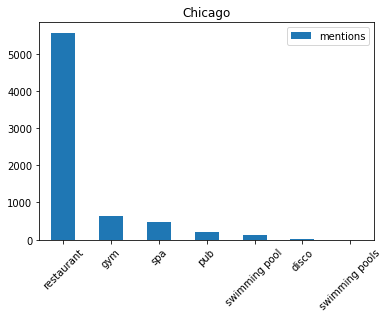

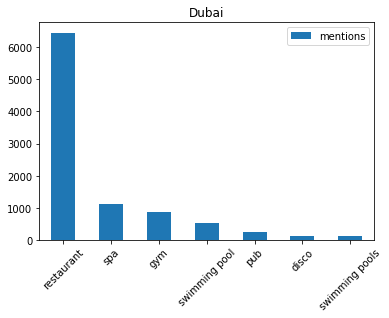

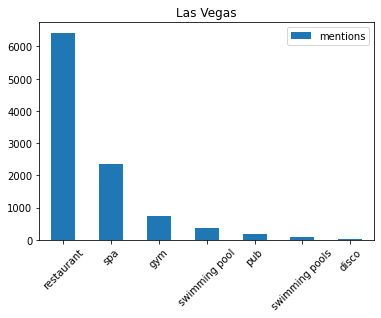

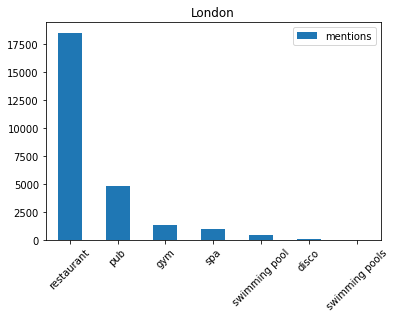

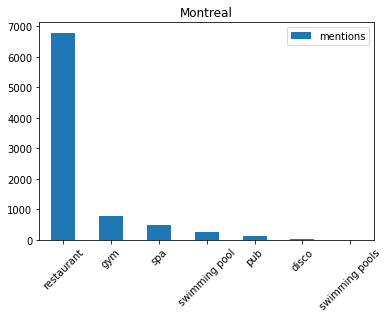

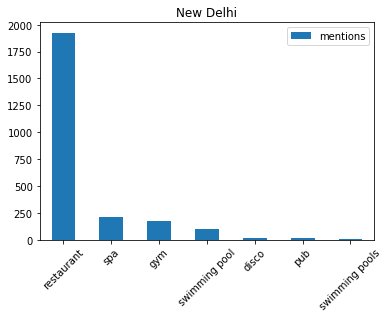

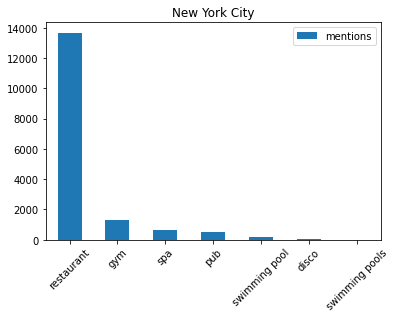

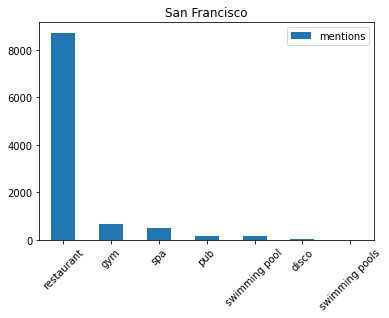

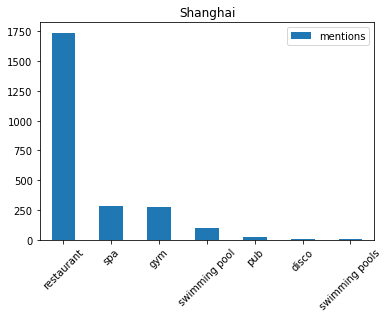

In [84]:
for city in cities:
    mentions=pd.DataFrame.from_dict(dict(hotel_info.loc[city].services.apply(lambda x: Counter(x)).sum().most_common()), orient="index", columns=["mentions"])[0:10]
    title=city.split("-")
    title=[x[0].upper() + x[1:len(x)] for x in title]
    title=" ".join(title)
    ax=mentions.plot.bar(title=title, rot=45)
    fig=ax.get_figure()
    #fig.savefig('graficos/'+city+"_services.png",bbox_inches="tight")


#  Lugares de interés

In [98]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

In [99]:
def places_of_interest(text):
    if type(text) == str:
        #cargamos el tockenizador
        nlp = en_core_web_sm.load()

        #eliminamos números y signos de puntuación
        text=text.translate(str.maketrans("","",string.punctuation)).translate(str.maketrans("","",string.digits))
        
        #tockenizamos el texto
        train = nlp(text)
  
        #definimos un conjunto
        places_list= set()
    
        

        
        for entity in train.ents:
            #filtramos las entidades de interés
            if entity.label_=="GPE" or entity.label_=="LOC" or entity.label_=="FAC":
                #guardamos en el conjunto
                places_list.add(entity.text.lower())
        return(places_list)

Definimos la columna *places*:

In [33]:
hotel_info["places"]=" "

Aplicación de la función *places_of_interest* sobre todos los hoteles: 

(Nota: se interrumpió tras unas horas 14 horas de ejecución) 

In [49]:
for city in cities:
    hotels=df.loc[city].index
    for hotel in tqdm.tqdm(hotels):
        reviews=df.loc[city].loc[hotel]
        reviews= reviews.dropna()
        
        words_for_review=reviews.apply(places_of_interest)
        hotel_info.loc[city].loc[hotel].places=words_for_review


 65%|█████████████████████████████████████████████████▌                          | 571/875 [6:36:12<3:30:56, 41.63s/it]


KeyboardInterrupt: 

El coste computacional es altísimo. Tras 14 horas de ejecución no se ha llegado ni a la mitad de las reviews. Para reducir la carga computacional, extraeremos una muestra aleatoria de 50 hoteles de cada ciudad a los cuales se les aplicará la búsqueda de lugares de interés. A su vez, si un hotel tiene más de 50 reviews, se extraerán 50 al azar:

In [ ]:
import random

In [101]:
for city in cities:
    hotels=df.loc[city].index
    hotels=hotels[random.sample(range(0,len(hotels)), 50)]
    for hotel in tqdm.tqdm(hotels):
        reviews=df.loc[city].loc[hotel]
        reviews= reviews.dropna()
        
        if len(reviews)>50:
            reviews=reviews[random.sample(range(0,len(reviews)), 50)]
            
        words_for_review=reviews.apply(places_of_interest)
        hotel_info.loc[city].loc[hotel].places=words_for_review


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [11:13<00:00, 13.46s/it]


In [97]:
hotel_info.head()

room_info  \
beijing china_beijing_aloft_beijing_haidian             {'room': 8, 'bed': 4, 'fridge': 1, 'table': 1}   
        china_beijing_ascott_beijing                 {'room': 54, 'bedroom': 20, 'kitchen': 17, 'ba...   
        china_beijing_autumn_garden_courtyard_hotel  {'room': 8, 'bathroom': 3, 'toilet': 1, 'subwa...   
        china_beijing_bamboo_garden_hotel            {'room': 69, 'bed': 21, 'bathroom': 17, 'bedro...   
        china_beijing_beijing_century_towers         {'room': 12, 'bedroom': 3, 'kitchen': 2, 'bed'...   

                                                                                              services  \
beijing china_beijing_aloft_beijing_haidian            {'gym': 2, 'restaurant': 2, 'swimming pool': 1}   
        china_beijing_ascott_beijing                 {'restaurant': 20, 'gym': 10, 'swimming pool': 1}   
        china_beijing_autumn_garden_courtyard_hotel                                                 {}   
        china_beijing_bamboo_garden_hotel                                 {'restaurant': 28, 'spa': 1}   
        china_beijing_beijing_century_towers                                         {'restaurant': 1}   

                                                                                                places  
beijing china_beijing_aloft_beijing_haidian          0                                     {aloha, ...  
        china_beijing_ascott_beijing                 0                                             ...  
        china_beijing_autumn_garden_courtyard_hotel  0                                      {asia, ...  
        china_beijing_bamboo_garden_hotel                                                               
        china_beijing_beijing_century_towers         0                     {astoria}\n1    {shangha...

In [103]:
for city in cities:
    #Cogemos los resultados de la muestra de hoteles elegida en el paso anterior
    chosen_hotels=hotel_info.loc[city].places.replace(r' ', float('NaN'), regex = True).dropna()
    
    # Calculamos el número de reviews total en la ciudad
    number_of_reviews=chosen_hotels.apply(lambda x: len(x)).sum()
    
    # Esta línea de código sirve para contar en cuántas reviews se menciona cada uno de los sitios de interés
    mentions=pd.DataFrame.from_dict(
        dict(chosen_hotels.apply(
            lambda x:  [Counter(dict.fromkeys(i,1)) for i in x]).apply(
            lambda x: sum(x, Counter())).sum()), 
        orient="index", columns=["fraction"]).sort_values(
        by=["fraction"],ascending=False)/number_of_reviews
    
    # Finalmente printamos los 20 lugares más mencionados en cada ciudad
    print("  ")
    print("-"*20+city+"-"*20)
    print(" ")
    print(mentions.apply(lambda x: np.round(x,3)).iloc[0:20])


  
--------------------beijing--------------------
 
                    fraction
beijing                0.493
china                  0.209
the forbidden city     0.059
breakfast              0.059
us                     0.051
the great wall         0.048
tiananmen square       0.034
shanghai               0.028
forbidden city         0.023
asia                   0.019
hong kong              0.013
hutong                 0.013
the summer palace      0.012
michaels               0.011
xidan                  0.010
nice                   0.010
ascott                 0.009
the grand hyatt        0.009
sihe                   0.009
the park plaza         0.008
  
--------------------chicago--------------------
 
                   fraction
chicago               0.388
michigan              0.055
michigan avenue       0.041
hilton                0.020
us                    0.016
breakfast             0.016
lake michigan         0.016
hotwire               0.015
the chicago river     0.013
linco

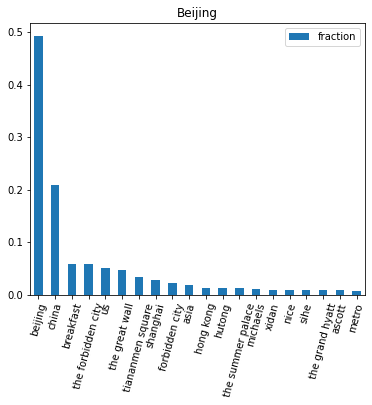

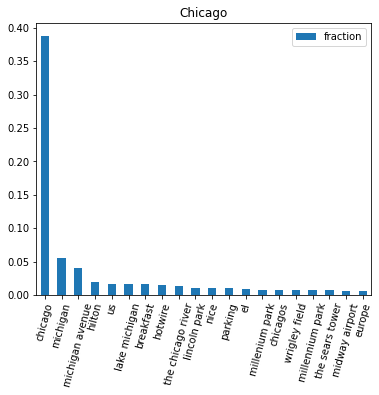

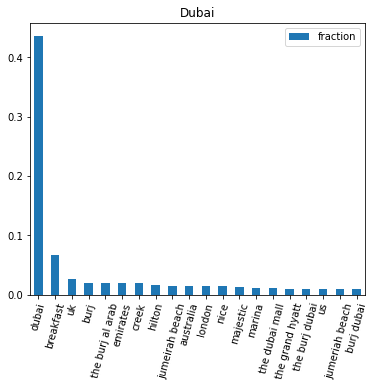

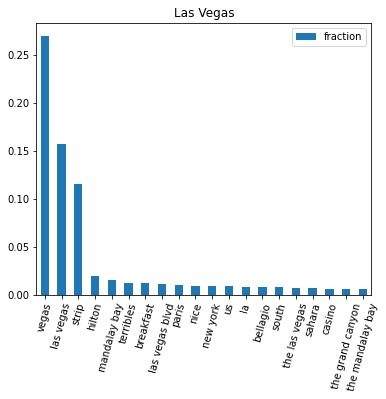

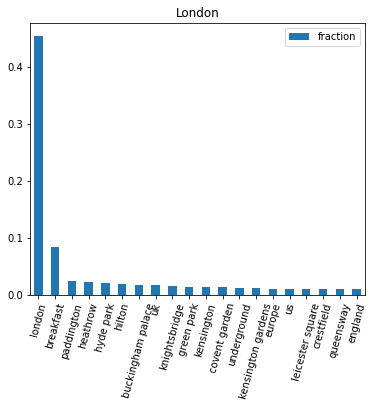

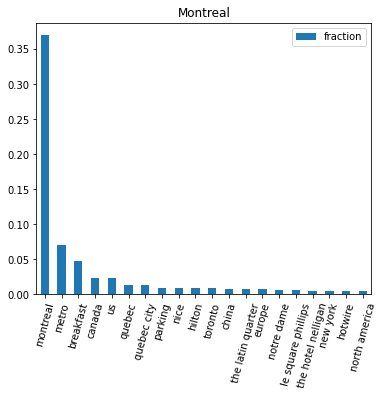

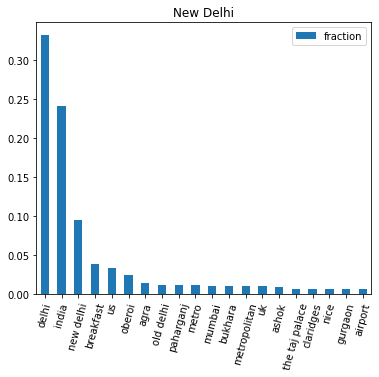

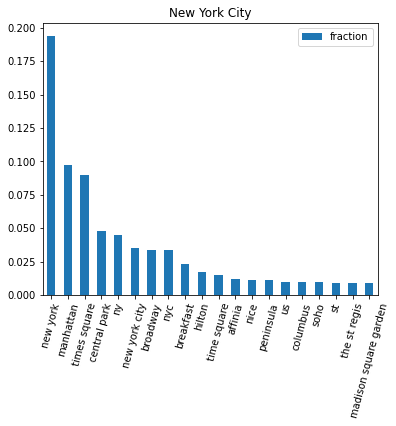

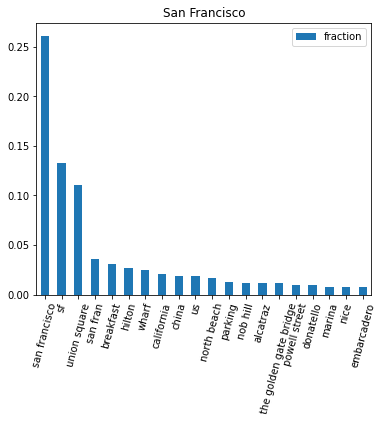

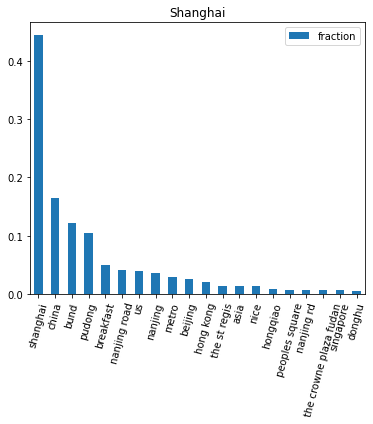

In [91]:
for city in cities:
    #Cogemos los resultados de la muestra de hoteles elegida en el paso anterior
    chosen_hotels=hotel_info.loc[city].places.replace(r' ', float('NaN'), regex = True).dropna()
    
    # Calculamos el número de reviews total en la ciudad
    number_of_reviews=chosen_hotels.apply(lambda x: len(x)).sum()
    
    # Esta línea de código sirve para contar en cuántas reviews se menciona cada uno de los sitios de interés
    mentions=pd.DataFrame.from_dict(
        dict(chosen_hotels.apply(
            lambda x:  [Counter(dict.fromkeys(i,1)) for i in x]).apply(
            lambda x: sum(x, Counter())).sum()), 
        orient="index", columns=["fraction"]).sort_values(
        by=["fraction"],ascending=False)/number_of_reviews
    

    
    title=city.split("-")
    title=[x[0].upper() + x[1:len(x)] for x in title]
    title=" ".join(title)
    
    
    ax=mentions.apply(lambda x: np.round(x,3)).iloc[0:20].plot.bar(title=title, rot=75, figsize=(6,5))
    fig=ax.get_figure()
    #fig.savefig('graficos/'+city+"_places.png",bbox_inches="tight")

In [106]:
hotel_info.to_pickle("hotel_info.pkl")